In [1]:
from dolfin import *
# Create mesh and define function space
mesh = UnitSquareMesh(6, 4)
V = FunctionSpace(mesh, "Lagrange", 1)

In [2]:
# Define boundary conditions
u0 = Expression("1 + x[0]*x[0] + 2*x[1]*x[1]", degree=2)
def u0_boundary(x, on_boundary):
    return on_boundary
bc = DirichletBC(V, u0, u0_boundary)
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = inner(grad(u), grad(v))*dx
L = f*v*dx
# Compute solutions
# Assemble the linear system matrix and force vector
A = assemble(a)
b = assemble(L)
# Impose the essential boundary conditions by modifying the matrices
bc.apply(A,b)

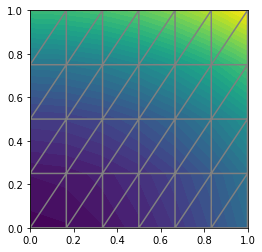

In [4]:
# Solve the linear system
u = Function(V)
u_vec = u.vector()
solve(A, u_vec, b, "gmres", "ilu")
# Plot solution and mesh
plot(u)
plot(mesh)
# Dump solution to file in VTK format
file = File("poisson.pvd")
file << u
# Hold plot